In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scp
import scipy as sci
import plotly.graph_objects as go

# From each class,read 100 sample points

In [2]:
mat_data=scp.loadmat('./mnistAll.mat')
class0=pd.DataFrame(mat_data['train0']).sample(100)
class0.insert(784,'label',0)
class1=pd.DataFrame(mat_data['train1']).sample(100)
class1.insert(784,'label',1)
class2=pd.DataFrame(mat_data['train2']).sample(100)
class2.insert(784,'label',2)
class3=pd.DataFrame(mat_data['train3']).sample(100)
class3.insert(784,'label',3)
class4=pd.DataFrame(mat_data['train4']).sample(100)
class4.insert(784,'label',4)
class5=pd.DataFrame(mat_data['train5']).sample(100)
class5.insert(784,'label',5)
class6=pd.DataFrame(mat_data['train6']).sample(100)
class6.insert(784,'label',6)
class7=pd.DataFrame(mat_data['train7']).sample(100)
class7.insert(784,'label',7)
class8=pd.DataFrame(mat_data['train8']).sample(100)
class8.insert(784,'label',8)
class9=pd.DataFrame(mat_data['train9']).sample(100)
class9.insert(784,'label',9)
data=pd.concat([class0,class1,class2,class3,class4,class5,class6,class7,class8,class9])
lable=data['label']
d=data.drop(['label'],axis=1)
A=d.to_numpy()


#  PCA with SVD ...

In [3]:
mean=np.mean(A,axis=0)
A_normal=(A-mean)

#SVD
#u=eigenvectores
eigen_vectors,eigen_values,v =np.linalg.svd(A_normal.T)
#(784,784) ,(784,),(1000,1000)


#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1] 
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]


#principal components 
n_component=2
components=sorted_eigenvectors[:,0:n_component]

transform=np.dot(A_normal,components)



# plot eigen values

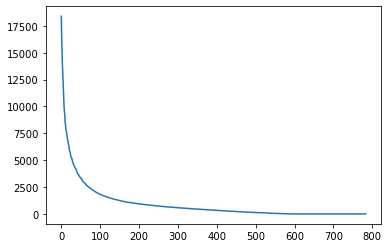

In [14]:
plt.plot(eigen_values)
plt.show()

## Explained Variance

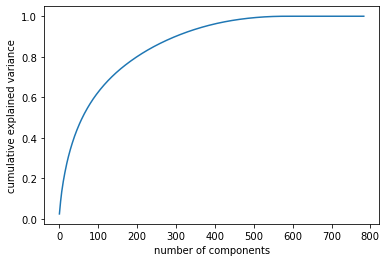

In [23]:
eig_vals_total = sum(sorted_eigenvalue)
explained_variance = [(i / eig_vals_total) for i in sorted_eigenvalue]
#explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
plt.plot(cum_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Plot data after dimension reduction

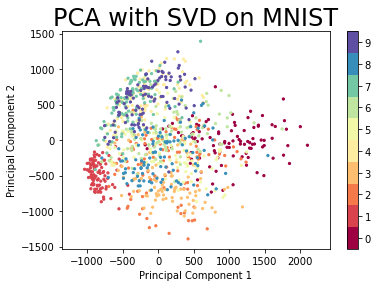

In [6]:
principal_df = pd.DataFrame(data = transform
             , columns = ['principal component 1', 'principal component 2'])

plt.scatter(transform[:, 0], transform[:, 1], s= 5, c=lable, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('PCA with SVD on MNIST', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [128]:
#fig = go.Figure(data=[go.Scatter(x=transform[:,0], y=transform[:,1],# z=Y, #z=proj_digits[:,2],
#                mode='markers', marker=dict(size=6, opacity=0.7, color=lable), text=['digit='+str(j) for j in lable] )])
#fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
#fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
#fig.show()